# <a id='toc1_'></a>[Convolutional Neural Network for Anime Image Classification](#toc0_)


**Table of contents**<a id='toc0_'></a>    
- [Convolutional Neural Network for Anime Image Classification](#toc1_)    
  - [Objectives](#toc1_1_)    
  - [Setup](#toc1_2_)    
    - [Installing Required Libraries](#toc1_2_1_)    
    - [Importing Required Libraries](#toc1_2_2_)    
  - [Load the Data](#toc1_3_)    
    - [Visualize the Dataset](#toc1_3_1_)    
  - [Define Custom Dataset Class](#toc1_4_)    
  - [Split Dataset into Training and Validation Sets](#toc1_5_)    
  - [Define the CNN Model](#toc1_6_)    
  - [Define Loss Function and Optimizer](#toc1_7_)    
  - [Train the Model](#toc1_8_)    
  - [Visualize the Training and Test Loss](#toc1_9_)    
  - [Exercises](#toc1_10_)    
    - [Exercise 1 - Change activation function to `leaky_relu`](#toc1_10_1_)    
    - [Exercise 2 - Increase the number of epochs and observe the training and validation loss](#toc1_10_2_)    
    - [Exercise 3 - Use different character classes for training and validation](#toc1_10_3_)    
  - [Authors](#toc1_11_)    
  - [Contributors](#toc1_12_)    


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms

from torchmetrics import Accuracy

from pathlib import Path
from PIL import Image
import random

plt.style.use("dark_background")

In [59]:
dataset_dir = Path("data/")
anastasia, takao = classes = ['anastasia', 'takao']
label_encode = {anastasia: 0, takao: 1}
label_decode = {0: anastasia, 1: takao}

anastasia_files = list((dataset_dir / anastasia).glob("*.jpg"))
takao_files = list((dataset_dir / takao).glob("*.jpg"))

In [60]:
len(anastasia_files), len(takao_files)

(50, 50)

In [61]:
sample_image = Image.open(anastasia_files[0]).convert("RGB")

sample_image.size

(96, 96)

In [62]:
class AnimeDataset(Dataset):
    def __init__(self, class0_files, class1_files, transform=None):
        self.file_paths = class0_files + class1_files
        self.class0_files = class0_files
        self.class1_files = class1_files
        self.labels = [0] * len(class0_files) + [1] * len(class1_files)
        self.transform = transform

    def show_image(self, idx):
        image_path = self.file_paths[idx]
        image = Image.open(image_path).convert("RGB")
        label = self.labels[idx]
        plt.imshow(image)
        plt.title(f"Label: {label_decode[label]}")
        plt.axis('off')
        plt.show()
    
    def show_class_images(self, num_images=5):
        anastasia_images = random.sample(self.class0_files, num_images)
        takao_images = random.sample(self.class1_files, num_images)
        
        fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
        for i, img_path in enumerate(anastasia_images):
            image = Image.open(img_path).convert("RGB")
            axes[0, i].imshow(image)
            axes[0, i].set_title("Anastasia")
            axes[0, i].axis('off')
        for i, img_path in enumerate(takao_images):
            image = Image.open(img_path).convert("RGB")
            axes[1, i].imshow(image)
            axes[1, i].set_title("Takao")
            axes[1, i].axis('off')
        plt.show()
    
    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        image_path = self.file_paths[idx]
        image = Image.open(str(image_path)).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [71]:
train_size = 0.8
random_state = 42

train_anastasia, val_anastasia = train_test_split(anastasia_files, train_size=train_size, random_state=random_state)
train_takao, val_takao = train_test_split(takao_files, train_size=train_size, random_state=random_state)

In [72]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = AnimeDataset(train_anastasia, train_takao, transform=transform)
val_dataset = AnimeDataset(val_anastasia, val_takao, transform=transform)

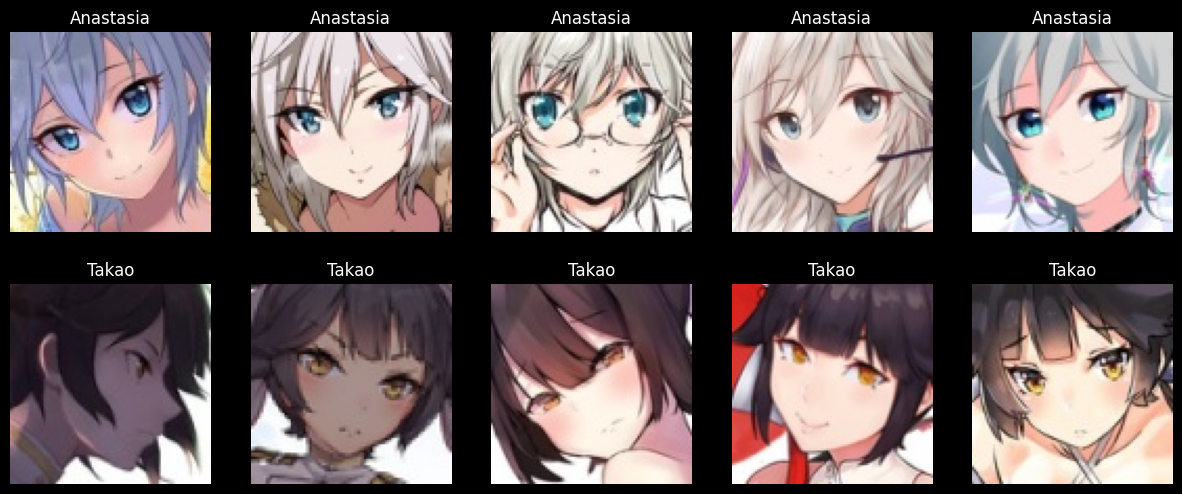

In [73]:
train_dataset.show_class_images()

In [74]:
len(train_dataset), len(val_dataset)

(80, 20)

In [75]:
class AnimeClassifier(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Conv2d(32, 16, kernel_size=(4, 4)),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Flatten(),
            nn.Linear(16 * 14 * 14, num_classes),
        )
    
    def forward(self, X):
        return self.model(X)
    
    def predict(self, X):
        with torch.no_grad():
            return self.forward(X)

In [76]:
(31 - 4 + 1) / 2

14.0

Epoch 1/20: train_loss = 0.6883, val_loss = 0.6709
Epoch 2/20: train_loss = 0.6715, val_loss = 0.6454
Epoch 3/20: train_loss = 0.6441, val_loss = 0.6097
Epoch 4/20: train_loss = 0.6083, val_loss = 0.5576
Epoch 5/20: train_loss = 0.5584, val_loss = 0.4927
Epoch 6/20: train_loss = 0.4957, val_loss = 0.4199
Epoch 7/20: train_loss = 0.4237, val_loss = 0.3389
Epoch 8/20: train_loss = 0.3469, val_loss = 0.2563
Epoch 9/20: train_loss = 0.2737, val_loss = 0.1890
Epoch 10/20: train_loss = 0.2112, val_loss = 0.1368
Epoch 11/20: train_loss = 0.1617, val_loss = 0.0927
Epoch 12/20: train_loss = 0.1221, val_loss = 0.0636
Epoch 13/20: train_loss = 0.0957, val_loss = 0.0439
Epoch 14/20: train_loss = 0.0768, val_loss = 0.0315
Epoch 15/20: train_loss = 0.0654, val_loss = 0.0227
Epoch 16/20: train_loss = 0.0573, val_loss = 0.0173
Epoch 17/20: train_loss = 0.0519, val_loss = 0.0133
Epoch 18/20: train_loss = 0.0465, val_loss = 0.0109
Epoch 19/20: train_loss = 0.0418, val_loss = 0.0090
Epoch 20/20: train_lo

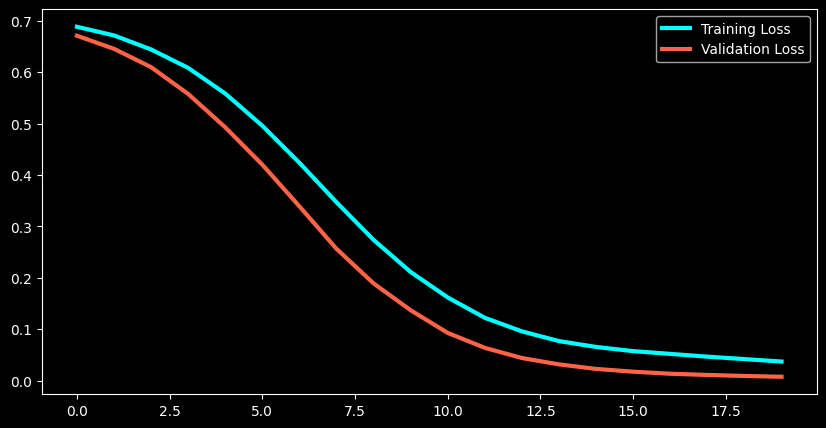

In [77]:
anime_classifier = AnimeClassifier(3, len(classes))

batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))

epochs = 20
lr = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(anime_classifier.parameters(), lr=lr)

train_losses = []
val_losses = []
for epoch in range(1, epochs + 1):
    train_loss = val_loss = 0
    
    anime_classifier.train()
    for X_batch, y_batch in train_loader:
        yhat = anime_classifier.forward(X_batch)
        loss = criterion(yhat, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    anime_classifier.eval()
    for X_batch, y_batch in val_loader:
        y_pred = anime_classifier.predict(X_batch)
        loss = criterion(y_pred, y_batch)
        val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch {epoch}/{epochs}: {train_loss = :.4f}, {val_loss = :.4f}")

plt.figure(figsize=(10, 5))
plt.plot(train_losses, color="cyan", linewidth=3, label="Training Loss")
plt.plot(val_losses, color="tomato", linewidth=3, label="Validation Loss")
plt.legend()

In [78]:
accuracy = Accuracy(task="multiclass", num_classes=len(classes))

train_x, train_y = next(iter(DataLoader(train_dataset, len(train_dataset))))
val_x, val_y = next(iter(DataLoader(val_dataset, len(val_dataset))))

y_train_pred = anime_classifier.predict(train_x)
y_val_pred = anime_classifier.predict(val_x)

train_accuracy = accuracy(y_train_pred, train_y)
val_accuracy = accuracy(y_val_pred, val_y)

print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Validation Accuracy: {val_accuracy:.2%}")

Training Accuracy: 98.75%
Validation Accuracy: 100.00%
